##### 분류란 샘플을 몇개의 클래스 중 하나로 분류하는 문제이다 (discrete)
##### 회귀(regression)는 클래스 중 하나로 분류하는 것이 아니라 임의의 어떤 숫자를 예측하는 문제이다. (linear)

# K-최근접 이웃에서 'K'는 클래스의 개수를 의미?함

In [2]:
import numpy as np

In [3]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0, 21.0, 21.0,
                         21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7, 3.0, 23.5, 24.0, 24.0,
                         24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5,
                         35.0, 36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0,
                         43.0, 43.0, 43.5, 44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0, 115.0, 125.0,
                         130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0, 150.0, 145.0, 150.0, 170.0, 225.0,
                         145.0, 188.0, 180.0, 197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
                         514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0, 850.0, 900.0,
                         1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0, 1000.0])

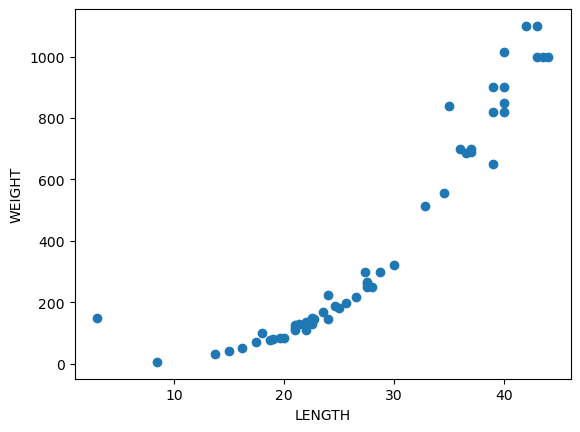

In [6]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel("LENGTH")
plt.ylabel("WEIGHT")
plt.show()


In [148]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight,
                                    random_state=42, test_size=0.2)
print(test_input)

[ 8.4 18.  27.5 21.3 22.5 40.  30.  24.6 39.  21.  43.5 16.2]


# NOTICE
##### 1. 'random_state='에 아무 값을 넣어도 셔플되어서 나오는 결괏값은 달라지지 않는다.
##### 2. 'random_state='를 빼고 'shuffle=True'를 넣으면 매번 결괏값이 달라진다.
##### 3. random_state='와 'shuffle=True'를  동시에 사용하면 결괏값은 한번섞인 그대로 고정되어 나온다.
##### 4. 'random_state='가 우선순위가 높나보다? 그리고 이 파라미터의 순서를 바꿔서 해도 달라지지 않는다.
##### 5. 'test_size='는 train_size : test_size의 디폴트 값은 0.75 : 0.25인데 'test_size=' or 'train_size=' 파라미터를 이용하여 임의로 비율을 바꿀 수 있다.

In [154]:
test_array = np.array([1,2,3,4,5,6])
print(test_array)

[1 2 3 4 5 6]


In [155]:
test_array = test_array.reshape(2,3)
print(test_array)

[[1 2 3]
 [4 5 6]]


In [156]:
print(test_array.shape)

(2, 3)


In [166]:
test_array1 = np.array([[1,2,3], [4,5,6]])
test_array1 = test_array1.reshape(6,)
print(test_array1)
print(test_array1.shape)

[1 2 3 4 5 6]
(6,)


##### reshape() 메소드는 n차원 배열을 m차원 배열로 바꾸는데 사용한다. (n,m > 0)
##### <주의> reshape() 메소드 사용 시, n차원 배열의 총 원소 개수와 m차원 배열의 총 원소 개수가 같아야 한다.

In [167]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(44, 1) (12, 1)


##### 1행과 2행의 reshape()메소드 안에 -1 값은 배열은 음수로 세는 법을 생각해보면 이해가 쉬울 것이다.

In [168]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(train_input, train_target)

knr.score(test_input, test_target)

0.9920387500619013

In [169]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)

mae = mean_absolute_error(test_target, test_prediction)
print(mae)

22.600000000000005


In [170]:
knr.score(train_input, train_target)

0.9688582516308265

In [171]:
knr.n_neighbors = 3

knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9792750887594779


##### 이웃의 개수는 default로 5개이다

In [172]:
print(knr.score(test_input, test_target))

0.9740450444162954
